# Exploratory Data Analysis (Netflix movie recommendation)

**<font color = 'teal' > After data wrangling, the exploratory data analysis will be carried out on both Kaggle and IMDB datasets. Both datasets contain only movies.**

## Import necessary Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part - I

## Import the Kaggle Netflix dataset:

In [2]:
Netflix = pd.read_csv('clean_datafiles/mydata_movies_only.csv', index_col = 0)

In [3]:
Netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration_min,listed_in,description
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [4]:
Netflix.tail(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration_min,listed_in,description
7781,s7782,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020,2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
Netflix.shape

(4761, 11)

### Drawing insight from "country" column

**<font color = 'teal'> There are different countries in the dataset making films, some make in large number while some make very few. This can be represented in a barplot, so let us sort out the countries according to the movie numbers.</font>**

In [6]:
Netflix.country.nunique()

539

In [7]:
arr = Netflix.country.value_counts()
arr2 = arr.head(20)

In [8]:
print('Country with maximum number of movies:', arr.idxmax(axis = 1))

Country with maximum number of movies: United States


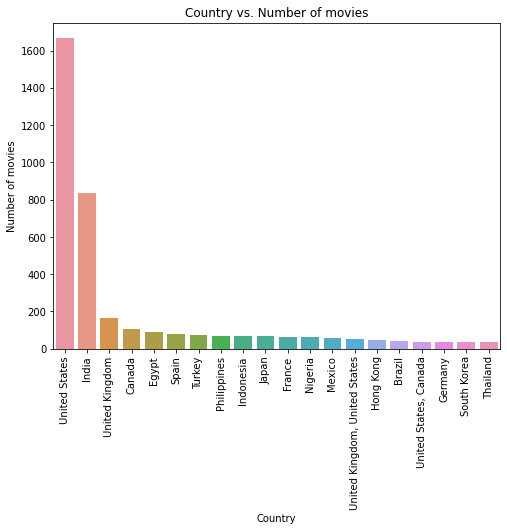

In [9]:
plt.figure(figsize = (8, 6))
sns.barplot(x = arr2.index, y = arr2.values)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Number of movies')
plt.title("Country vs. Number of movies")
plt.show()

Here, it can be seen that USA produced maximum number of movies, India ranks second while United Kingdom in third place. 

**<font color = 'teal'> In different years movies have been released. Below, there will a detail investigation:</font>**

In [10]:
ReleaseYear = Netflix.release_year.value_counts()
ReleaseYear2 = ReleaseYear.head(20)
print("The number of years the movies have been released: ", Netflix.release_year.nunique())
print("The maximum number of movies released in the year: ", ReleaseYear.idxmax(axis = 1))

The number of years the movies have been released:  71
The maximum number of movies released in the year:  2017


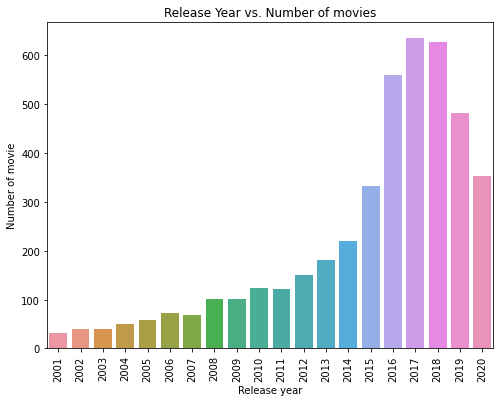

In [11]:
plt.figure(figsize = (8, 6))
sns.barplot(x = ReleaseYear2.index, y = ReleaseYear2.values)
plt.xlabel('Release year')
plt.ylabel('Number of movie')
plt.title("Release Year vs. Number of movies")
plt.xticks(rotation = 90)
plt.show()

**<font color = 'teal'>Let us investigate about the number of movies have been added in different years.</font>**

In [12]:
added_year = Netflix.date_added.value_counts()
added_year2 = added_year.head(20)
print('Country with maximum number of movies:', added_year.idxmax(axis = 1))

Country with maximum number of movies: 2019


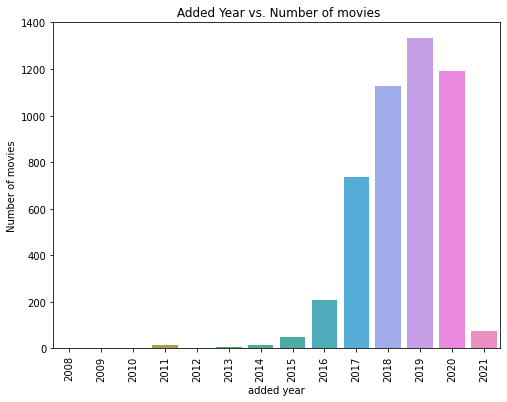

In [13]:
plt.figure(figsize = (8, 6))
sns.barplot(x = added_year2.index, y = added_year2.values)
plt.xlabel('added year')
plt.ylabel('Number of movies')
plt.title(" Added Year vs. Number of movies")
plt.xticks(rotation = 90)
plt.show()

**<font color = 'teal'> Investigate the movies' duration time in minutes.</font>**

In [14]:
duration = Netflix.duration_min.value_counts()
duration2 = Netflix.duration_min.value_counts().head(20)
duration2

93     121
94     120
90     117
95     114
97     108
91     106
92     102
96     100
98      95
99      94
103     94
102     93
88      89
101     88
106     88
100     85
105     84
86      84
104     84
110     80
Name: duration_min, dtype: int64

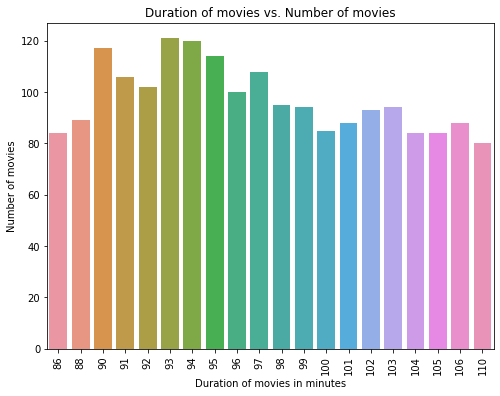

In [15]:
plt.figure(figsize = (8, 6))
sns.barplot(x = duration2.index, y = duration2.values)
plt.xlabel('Duration of movies in minutes')
plt.ylabel('Number of movies')
plt.title('Duration of movies vs. Number of movies')
plt.xticks(rotation = 90)
plt.show()

In [16]:
print("The maximum number of movies of duration: ", duration.idxmax(axis = 1), 'minutes')
print("The minimum number of movies of duration: ", duration.idxmin(axis = 1), 'minutes')
print('Maximum duration of the movie:', Netflix.duration_min.max(), 'minutes')
print('Minimum duration of the movie:', Netflix.duration_min.min(), 'minutes')

The maximum number of movies of duration:  93 minutes
The minimum number of movies of duration:  191 minutes
Maximum duration of the movie: 312 minutes
Minimum duration of the movie: 8 minutes


**<font color = 'teal'>  Let us investigate into the number of movies of different rated categories.</font>**

In [17]:
movie_rating = Netflix.rating.value_counts()

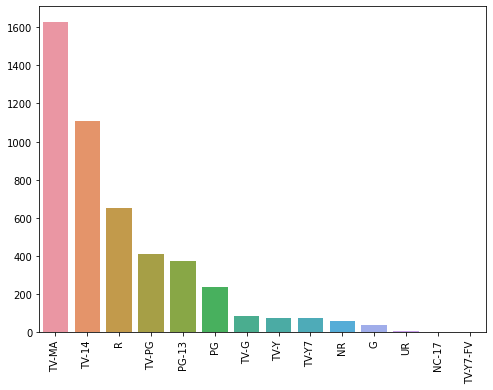

In [18]:
plt.figure(figsize = (8, 6))
sns.barplot(x = movie_rating.index, y = movie_rating.values)
plt.xticks(rotation = 90)
plt.show()

**<font color = 'teal'> Let us investigate how many countries are there who have produced movies. </font>**

In [19]:
Netflix_country =  Netflix.country.str.split(',')
Netflix_country2 = pd.Series(Netflix_country)
Netflix_country2
list_country = []
for i in Netflix_country2:
    list_country.extend(i)
list_country2 = set(list_country)
print(list_country2)
print(len(list_country2))

list_country3 = []

for j in list_country2:
    list_country3.append(j.strip())

print(sorted(set(list_country3)))

{'', 'New Zealand', ' Nicaragua', ' Serbia', ' Luxembourg', 'Saudi Arabia', 'Singapore', ' Thailand', ' China', ' Netherlands', ' Afghanistan', ' Japan', 'Jamaica', ' Switzerland', 'Bangladesh', 'Turkey', ' Colombia', 'Czech Republic', ' Mexico', ' Montenegro', ' Panama', 'Cambodia', 'Georgia', 'Japan', ' Portugal', 'Pakistan', 'Argentina', ' Indonesia', 'United Kingdom', ' France', ' India', ' West Germany', ' Kenya', ' Soviet Union', ' Czech Republic', ' United Kingdom', ' Belgium', ' Croatia', 'Australia', ' East Germany', 'Kenya', 'Slovenia', ' Liechtenstein', ' Latvia', 'Venezuela', 'Spain', ' Iraq', ' Morocco', ' Iran', ' Finland', 'Egypt', 'Colombia', ' Cambodia', ' Norway', 'Netherlands', 'Indonesia', ' Malawi', ' Lebanon', 'Somalia', ' Israel', ' Hong Kong', 'Paraguay', 'Iceland', 'India', 'Israel', 'Poland', ' Canada', ' Taiwan', ' Australia', 'Namibia', 'Switzerland', ' Ireland', ' Argentina', ' Jordan', ' Nepal', 'Malaysia', ' Germany', 'Portugal', 'Chile', ' Bulgaria', ' B

### **<font color = 'teal'> Distribution of duration of the movies in minutes</font>**  

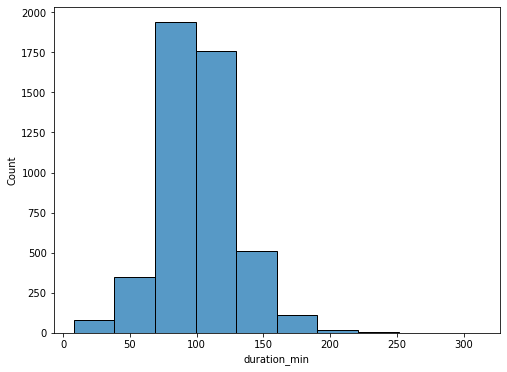

In [20]:
plt.figure(figsize = (8, 6))
sns.histplot(Netflix.duration_min, bins = 10)
plt.show()

### **<font color = 'teal'> Distribution of the Indian movies duration in minutes </font>**

In [21]:
India_movie_duration = Netflix[Netflix.country == 'India']['duration_min']


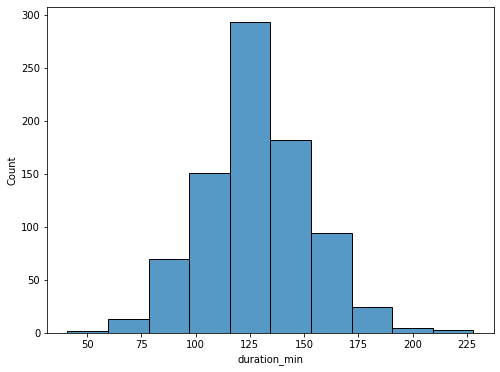

In [22]:
plt.figure(figsize = (8, 6))
sns.histplot(India_movie_duration, bins = 10)
plt.show()

### **<font color = 'teal'> Distribution of the USA movies duration in minutes </font>**

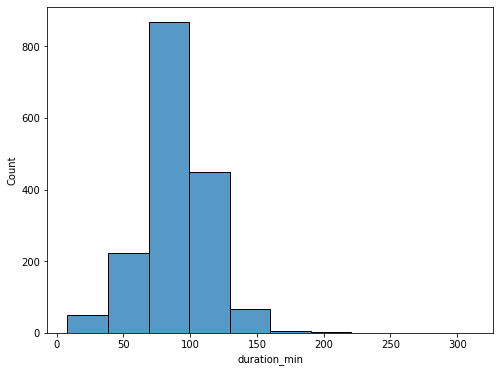

In [23]:
USA_movie_duration = Netflix[Netflix.country == 'United States']['duration_min']


plt.figure(figsize = (8,6))
sns.histplot(USA_movie_duration, bins = 10)
plt.show()

### **<font color = 'teal'> Distribution of the United Kingdom movies duration in minutes </font>**

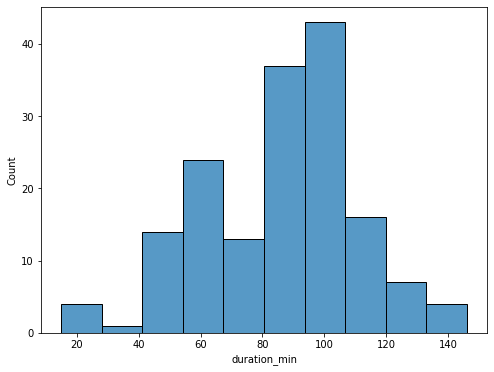

In [24]:
United_Kingdom_movie_duration = Netflix[Netflix.country == 'United Kingdom']['duration_min']


plt.figure(figsize = (8, 6))
sns.histplot(United_Kingdom_movie_duration, bins = 10)
plt.show()

### **<font color = 'teal'>  Type of movies </font>**

In [25]:
Netflix_listed_in =  Netflix.listed_in.str.split(',')
Netflix_listed_in2 = pd.Series(Netflix_listed_in)
Netflix_listed_in2
list_category = []
for i in Netflix_listed_in2:
    list_category.extend(i)

list_category2 = []

for j in set(list_category):
    list_category2.append(j.strip())

list_category3 = sorted(set(list_category2))
print(len(list_category3))
print(list_category3)

20
['Action & Adventure', 'Anime Features', 'Children & Family Movies', 'Classic Movies', 'Comedies', 'Cult Movies', 'Documentaries', 'Dramas', 'Faith & Spirituality', 'Horror Movies', 'Independent Movies', 'International Movies', 'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Romantic Movies', 'Sci-Fi & Fantasy', 'Sports Movies', 'Stand-Up Comedy', 'Thrillers']


In [26]:
Netflix.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration_min', 'listed_in', 'description'],
      dtype='object')

**<font color = 'teal'>There is no need of the "show_id", "type" and "rating" columns, hence these are dropped from the dataset.</font>**

In [27]:
Netflix.drop(columns = ['show_id', 'type', 'rating'], inplace = True)

In [28]:
Netflix.columns

Index(['title', 'cast', 'country', 'date_added', 'release_year',
       'duration_min', 'listed_in', 'description'],
      dtype='object')

# Part-II

In [29]:
IMDBdata = pd.read_csv('clean_datafiles/IMDB_Movies_cleaned.csv', index_col = 0)

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
IMDBdata.head(2)

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users
0,tt0000009,Miss Jerry,1894,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,1.0
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,7.0


In [31]:
IMDBdata.shape

(72043, 15)

In [32]:
IMDBdata.columns  

Index(['imdb_title_id', 'original_title', 'year', 'genre', 'duration',
       'country', 'language', 'director', 'writer', 'production_company',
       'actors', 'description', 'avg_vote', 'votes', 'reviews_from_users'],
      dtype='object')

In [33]:
IMDBdata.dtypes

imdb_title_id          object
original_title         object
year                   object
genre                  object
duration                int64
country                object
language               object
director               object
writer                 object
production_company     object
actors                 object
description            object
avg_vote              float64
votes                   int64
reviews_from_users    float64
dtype: object

In [34]:
IMDBdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72043 entries, 0 to 85851
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   imdb_title_id       72043 non-null  object 
 1   original_title      72043 non-null  object 
 2   year                72043 non-null  object 
 3   genre               72043 non-null  object 
 4   duration            72043 non-null  int64  
 5   country             72043 non-null  object 
 6   language            72043 non-null  object 
 7   director            72043 non-null  object 
 8   writer              72043 non-null  object 
 9   production_company  72043 non-null  object 
 10  actors              72043 non-null  object 
 11  description         72043 non-null  object 
 12  avg_vote            72043 non-null  float64
 13  votes               72043 non-null  int64  
 14  reviews_from_users  72043 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 8.8

**<font color = 'teal'> Here, "year" column is "Object" i.e string. So further investigation is needed and change column to integer type.**

In [35]:
IMDBdata2_year = pd.Series(IMDBdata.year)
print(set(IMDBdata2_year))

{'1970', '2006', 'TV Movie 2019', '1994', '2000', '1974', '1984', '1998', '2015', '2013', '1999', '2007', '1971', '1997', '1979', '2017', '2018', '2020', '2014', '2016', '1982', '2012', '2011', '2001', 1894, 1906, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, '2019'}


**<font color = 'teal'> Here, one can see that one value is 'TV Movie 2019', therefore dtype of that column is showing "Object". So it needs to be converted to integer.**

In [36]:
IMDBdata[IMDBdata['year'] =='TV Movie 2019']

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users
83917,tt8206668,Bad Education,TV Movie 2019,"Biography, Comedy, Crime",108,USA,English,Cory Finley,"Mike Makowsky, Robert Kolker",HBO Films,"Hugh Jackman, Ray Romano, Welker White, Alliso...",The beloved superintendent of New York's Rosly...,7.1,23973,135.0


In [37]:
IMDBdata.replace({'year': {'TV Movie 2019' : '2019'}}, inplace = True)
IMDBdata2_year = pd.Series(IMDBdata.year)

year2 = []

for k in IMDBdata2_year:
    year2.append(int(k))
IMDBdata.year = year2

print(sorted(set(year2)),"\n")
print(len(sorted(set(year2))))

[1894, 1906, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] 

112


In [38]:
IMDBdata.dtypes

imdb_title_id          object
original_title         object
year                    int64
genre                  object
duration                int64
country                object
language               object
director               object
writer                 object
production_company     object
actors                 object
description            object
avg_vote              float64
votes                   int64
reviews_from_users    float64
dtype: object

In [39]:
IMDBdata.year.value_counts().head()

2017    2621
2018    2614
2016    2500
2015    2353
2014    2314
Name: year, dtype: int64

**<font color = 'teal'> This shows that maximum number of movies are produced in the year 2017.**

In [40]:
IMDBdata[IMDBdata['year'] == 2020].shape

(628, 15)

In [41]:
df2 = IMDBdata[IMDBdata['year'] == 2019]
df2.year.count()

2221

In [42]:
IMDBdata_genre = IMDBdata.genre.str.split(',')
IMDBdata_genre2 = pd.Series(IMDBdata_genre)
IMDBdata_genre2
list_genre = []
for i in IMDBdata_genre2:
    list_genre.extend(i)
list_genre2 = set(list_genre)
genre2 = []
for element in list_genre2:
    genre2.append(element.strip())
print(sorted(set(genre2)))

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


# Number of movies made by each country 

In [43]:
IMDB_country = IMDBdata.country.value_counts()
IMDB_country2 = IMDB_country.head(20)
IMDB_country2

USA              26552
India             4419
UK                3869
France            2650
Japan             2484
Italy             1795
Canada            1612
Germany           1130
Hong Kong         1068
Spain              954
South Korea        820
Australia          729
UK, USA            670
Turkey             566
Mexico             536
Brazil             515
Sweden             494
Soviet Union       464
Italy, France      447
France, Italy      423
Name: country, dtype: int64

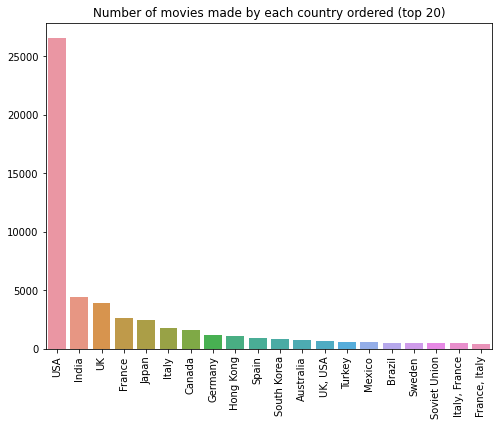

In [44]:
plt.figure(figsize = (8, 6))
sns.barplot(x = IMDB_country2.index, y = IMDB_country2.values)
plt.xticks(rotation = 90)
plt.title('Number of movies made by each country ordered (top 20)')
plt.show()

**Like the Kaggle dataset, this dataset from IMDB also shows that USA ranked One in movie production, India ranked Second while UK in Third place.** 

In [45]:
IMDBdata_country = IMDBdata.groupby(['country','language']).sum()
IMDBdata_country.head()

year  duration  avg_vote  \
country                          language                                  
Afghanistan, France              Dari           2013        85       7.3   
                                 Dari, Pushto   2004       102       7.8   
Afghanistan, France, Germany, UK Persian        2012       102       6.9   
Afghanistan, Iran                Persian        2014        90       7.1   
                                 Persian, Dari  2018        80       6.5   

                                                votes  reviews_from_users  
country                          language                                  
Afghanistan, France              Dari             380                 4.0  
                                 Dari, Pushto     448                 3.0  
Afghanistan, France, Germany, UK Persian         4503                19.0  
Afghanistan, Iran                Persian          523                 2.0  
                                 Persian, Dari    217                 1.0

In [46]:
IMDBdata_USA = IMDBdata_country.loc['USA']
IMDBdata_USA

,year,duration,avg_vote,votes,reviews_from_users
language,,,,,
"Afrikaans, Zulu, English",1989,106,7.0,4943,39.0
American Sign Language,2008,100,5.5,129,10.0
"American Sign Language, English",5951,270,18.7,2860,59.0
"Arabic, English",4029,182,10.9,2776,31.0
"Arabic, English, Hebrew",2010,100,6.2,523,15.0
...,...,...,...,...,...
"Uzbek, English, Dari, Russian, Spanish",2018,130,6.6,64601,376.0
Vietnamese,2003,89,6.7,102,5.0
"Vietnamese, English",2006,135,7.1,829,19.0


In [47]:
IMDBdata_India = IMDBdata_country.loc['India']
IMDBdata_India

,year,duration,avg_vote,votes,reviews_from_users
language,,,,,
Assamese,8068,411,30.2,2662,96.0
Bengali,408827,25332,1386.4,182833,1748.0
"Bengali, Assamese, Hindi, Tamil, Telugu, Oriya",2017,140,4.7,1076,19.0
"Bengali, English",10008,625,31.6,910,10.0
"Bengali, English, Hindi",2010,104,7.2,403,8.0
...,...,...,...,...,...
"Telugu, Urdu, Hindi",2013,150,6.6,839,4.0
Urdu,13851,1080,46.5,3210,52.0
"Urdu, English, Hindi",1963,164,6.9,183,3.0


In [48]:
IMDBdata_UK = IMDBdata_country.loc['UK']
IMDBdata_UK

,year,duration,avg_vote,votes,reviews_from_users
language,,,,,
"Aboriginal, English",1970,100,5.2,2216,65.0
"Arabic, German, English",2017,93,5.2,2164,49.0
"Bulgarian, English, Romanian",2017,104,7.7,23337,158.0
"Dutch, English",1965,112,7.6,14544,125.0
English,6750181,318296,19441.4,10737487,95794.0
...,...,...,...,...,...
"Scots, English",2008,85,6.8,205,12.0
"Scots, German",1972,46,7.4,1077,7.0
"Urdu, English",2017,92,6.3,257,4.0


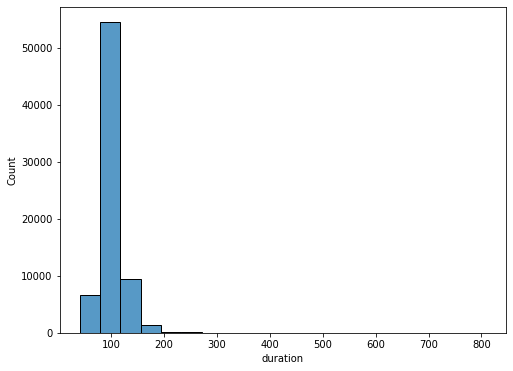

In [49]:
plt.figure(figsize = (8, 6))
sns.histplot(IMDBdata.duration, bins = 20)
plt.show()

In [50]:
print("Maximum movie length:", IMDBdata.duration.max())
print("Minimum movie length:", IMDBdata.duration.min())

Maximum movie length: 808
Minimum movie length: 41


In [51]:
IMDBdata[IMDBdata.duration == 808]

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users
85057,tt9047474,La flor,2016,"Drama, Fantasy, Musical",808,Argentina,"Catalan, Spanish, French, English, Russian, Ge...",Mariano Llinás,Mariano Llinás,El Pampero Cine,"Elisa Carricajo, Valeria Correa, Pilar Gamboa,...","A film in six episodes, connected by the same ...",7.7,473,5.0


In [52]:
IMDBdata[IMDBdata.duration == 41]

,imdb_title_id,original_title,year,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users
32798,tt0142235,Doragon bôru Z,1989,"Animation, Action, Adventure",41,Japan,Japanese,Daisuke Nishio,"Akira Toriyama, Takao Koyama",Toei Animation,"Masako Nozawa, Toshio Furukawa, Hiromi Tsuru, ...",In order to wish for immortality and avenge hi...,7.0,6042,17.0


# Total Number of Languages 

In [53]:
IMDBdata_language = IMDBdata.language.str.split(',')
IMDBdata_language2 = pd.Series(IMDBdata_language)
IMDBdata_language2
list_language = []
for i in IMDBdata_language2:
    list_language.extend(i)

languages = sorted(set(list_language))

languages2 = []
for each in languages:
    languages2.append(each.strip())
print(languages2)
print("\n",len(languages2))
print("\nTotal number of languages:", len(set(languages2))) 


['Abkhazian', 'Aboriginal', 'Afrikaans', 'Akan', 'Albanian', 'Algonquin', 'American Sign Language', 'Amharic', 'Ancient (to 1453)', 'Apache languages', 'Arabic', 'Aragonese', 'Aramaic', 'Arapaho', 'Armenian', 'Assamese', 'Assyrian Neo-Aramaic', 'Athapascan languages', 'Australian Sign Language', 'Awadhi', 'Aymara', 'Azerbaijani', 'Bable', 'Balinese', 'Bambara', 'Basque', 'Belarusian', 'Bemba', 'Bengali', 'Berber languages', 'Bhojpuri', 'Bicolano', 'Bosnian', 'Brazilian Sign Language', 'Breton', 'British Sign Language', 'Bulgarian', 'Burmese', 'Cantonese', 'Catalan', 'Central American Indian languages', 'Chechen', 'Cheyenne', 'Chinese', 'Cornish', 'Corsican', 'Cree', 'Creek', 'Crimean Tatar', 'Croatian', 'Crow', 'Czech', 'Danish', 'Dari', 'Dinka', 'Dutch', 'Dyula', 'Dzongkha', 'Eastern Frisian', 'Egyptian (Ancient)', 'English', 'Esperanto', 'Estonian', 'Ewe', 'Faroese', 'Filipino', 'Finnish', 'Flemish', 'French', 'French Sign Language', 'Frisian', 'Fulah', 'Gallegan', 'Georgian', 'Germa

In [54]:
IMDB_Ind_director = IMDBdata[IMDBdata['country'] == 'India']['director']
IMDB_Ind_director

2514     Vishnupant Govind Damle, Sheikh Fattelal
5736                                   Raj Kapoor
6072                                 Mehboob Khan
6082                                   Raj Kapoor
6233                                 Kamal Amrohi
                           ...                   
85823                                 Vyasan K.P.
85828                              Vijith Nambiar
85843                            Lokesh Kanagaraj
85844                             Aswani Kumar V.
85847                                         Zam
Name: director, Length: 4419, dtype: object

In [55]:
IMDB_Ind_director.value_counts().head(20)

Ram Gopal Varma                                        38
David Dhawan                                           37
Priyadarshan                                           32
Mahesh Bhatt                                           27
Satyajit Ray                                           25
Vikram Bhatt                                           24
Puri Jagannadh                                         21
Mani Ratnam                                            20
Hrishikesh Mukherjee                                   19
Yash Chopra                                            18
Shyam Benegal                                          16
Rituparno Ghosh                                        16
Gautham Menon                                          15
Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla    15
Srijit Mukherji                                        15
K.S. Ravikumar                                         14
Anurag Kashyap                                         14
Shakti Samanta

In [56]:
IMDB_USA_director = IMDBdata[IMDBdata['country'] == 'USA']['director']
IMDB_USA_director.value_counts().head(20)

Michael Curtiz        82
Lesley Selander       77
Lloyd Bacon           73
William Beaudine      64
Gordon Douglas        63
Richard Thorpe        62
John Ford             59
Mervyn LeRoy          59
Norman Taurog         56
Joseph Kane           53
Alfred E. Green       52
Raoul Walsh           52
William A. Seiter     51
William A. Wellman    51
George Marshall       50
Roy Del Ruth          48
Ray Enright           48
Lew Landers           48
Fred Olen Ray         46
Henry Hathaway        46
Name: director, dtype: int64

In [57]:
IMDB_UK_director = IMDBdata[IMDBdata['country'] == 'UK']['director']
IMDB_UK_director.value_counts().head(20)

Gerald Thomas           39
Ralph Thomas            34
Terence Fisher          30
Basil Dearden           29
Val Guest               28
Ken Annakin             22
John Gilling            22
Anthony Asquith         22
Lewis Gilbert           22
Alfred Hitchcock        21
Roy Ward Baker          21
Freddie Francis         20
Carol Reed              19
Marcel Varnel           17
J. Lee Thompson         16
Andrew Jones            16
John Paddy Carstairs    16
Herbert Wilcox          15
Michael Winterbottom    15
Lance Comfort           15
Name: director, dtype: int64

# Insight into Movie Production companies from top movie production company

In [58]:
IMDBdata.production_company.nunique()

29121

In [59]:
IMDBdata.production_company.value_counts()

Metro-Goldwyn-Mayer (MGM)     1267
Warner Bros.                  1143
Columbia Pictures              909
Paramount Pictures             888
Twentieth Century Fox          863
                              ... 
Weirdsmobile Productions         1
BLC Services                     1
Cooper Movie Productions         1
Cine Artists International       1
Bartlett Films                   1
Name: production_company, Length: 29121, dtype: int64

**<font color = 'teal'> USA's top movie production companies </font>** 

In [60]:
IMDBdata[IMDBdata.country =='USA']['production_company'].nunique()

11076

In [61]:
IMDBdata[IMDBdata.country =='USA']['production_company'].value_counts().head(20)

Metro-Goldwyn-Mayer (MGM)                1182
Warner Bros.                              967
Paramount Pictures                        771
Twentieth Century Fox                     760
Columbia Pictures                         738
Universal Pictures                        563
RKO Radio Pictures                        530
Universal International Pictures (UI)     272
Republic Pictures (I)                     208
First National Pictures                   152
New Line Cinema                           150
Touchstone Pictures                       114
Monogram Pictures                         114
Walt Disney Productions                   110
Fox Film Corporation                      104
Walt Disney Pictures                       91
Sam Katzman Productions                    82
TriStar Pictures                           79
Allied Artists Pictures                    69
The Samuel Goldwyn Company                 66
Name: production_company, dtype: int64

**<font color = 'teal'> India's top movie production companies </font>**  

In [62]:
IMDBdata[IMDBdata.country =='India']['production_company'].nunique()

2205

In [63]:
IMDBdata[IMDBdata.country =='India']['production_company'].value_counts().head(20)

NH Studioz                                               107
SVF Entertainment                                         54
Yash Raj Films                                            48
Eros International                                        38
Dharma Productions                                        35
Sri Venkateswara Creations                                25
Fox STAR Studios                                          24
UTV Motion Pictures                                       23
National Film Development Corporation of India (NFDC)     19
Angel Digital Private Limited                             19
Mukta Arts                                                19
Raajkamal Films International                             18
Everest Entertainment                                     17
Rajshri Productions                                       17
Balaji Motion Pictures                                    16
R.K. Films Ltd.                                           16
Annapurna Studios       

**<font color = 'teal'> UK's top movie production companies </font>** 

In [64]:
IMDBdata[IMDBdata.country =='UK']['production_company'].nunique()

1910

In [65]:
IMDBdata[IMDBdata.country =='UK']['production_company'].value_counts().head(20)

The Rank Organisation                            107
Hammer Films                                      68
Gainsborough Pictures                             67
Ealing Studios                                    63
London Film Productions                           59
Associated British Picture Corporation (ABPC)     58
BBC Films                                         48
Two Cities Films                                  38
Gaumont British Picture Corporation               36
Columbia Pictures                                 34
Channel Four Films                                31
British Broadcasting Corporation (BBC)            29
British Screen Productions                        25
Romulus Films                                     24
Columbia Pictures Corporation                     23
J. Arthur Rank Organisation                       22
EMI Films                                         22
Peter Rogers Productions                          20
British Film Institute (BFI)                  

# Insight into actors

In [66]:
# This coding output was taking was taking lots of space, hence didn't carry out
#IMDBdata_actors2 = IMDBdata.actors.str.split(',')
#IMDBdata_actors3 = pd.Series(IMDBdata_actors2)
#print(IMDBdata_actors3)

#list_actors3 = []

#for i in IMDBdata_actors3:
#    list_actors3.extend(i)

#IMDBdata_actors4 = sorted(set(list_actors3))
#print(IMDBdata_actors4)

#list_actors = []
#for j in IMDBdata_actors4:
#    list_actors.append(j.strip())
#print(list_actors)
#print(len(list_actors))
#print(set(list_actors))


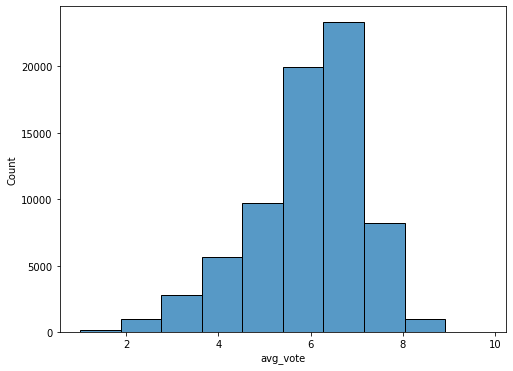

In [67]:
plt.figure(figsize = (8, 6))
sns.histplot(IMDBdata.avg_vote, bins = 10)
plt.show()

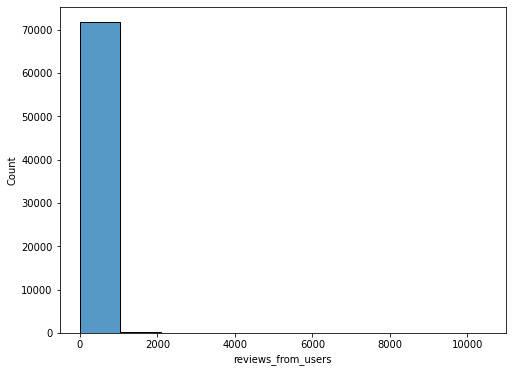

In [68]:
plt.figure(figsize = (8, 6))
sns.histplot(IMDBdata.reviews_from_users, bins = 10)
plt.show()

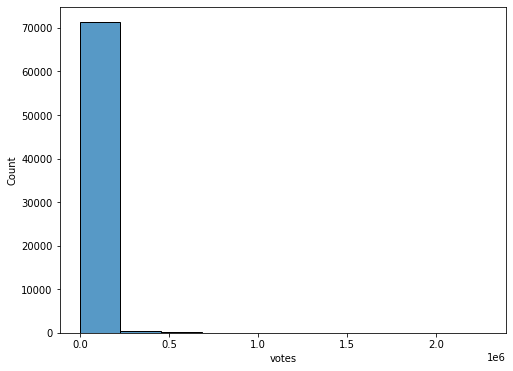

In [69]:
plt.figure(figsize = (8, 6))
sns.histplot(IMDBdata.votes, bins = 10)
plt.show()

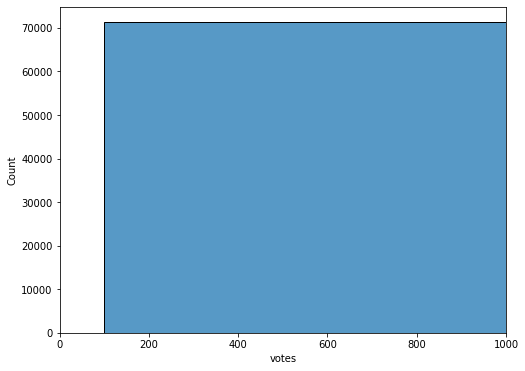

In [70]:
plt.figure(figsize = (8, 6))
sns.histplot(IMDBdata.votes, bins = 10)
plt.xlim([0, 1000])
plt.show()

In [71]:
IMDBdata.columns

Index(['imdb_title_id', 'original_title', 'year', 'genre', 'duration',
       'country', 'language', 'director', 'writer', 'production_company',
       'actors', 'description', 'avg_vote', 'votes', 'reviews_from_users'],
      dtype='object')

**<font color = 'teal'> The 'imdb_title_id' column seems to be not useful for further analysis or building Machine Learning model. Hence this columns needs to be dropped from the dataset.**

In [72]:
IMDBdata.drop(columns = ['imdb_title_id'], inplace = True )

In [73]:
#Netflix.merge(IMDBdata, how = 'left').head(2)

In [74]:
#IMDBdata.merge(Netflix, how = 'left').head()

**<font color = 'teal'> To have a look into the correlation between columns in this datset, a pairplot was plotted.**

In [75]:
IMDBdata.dropna(inplace = True)

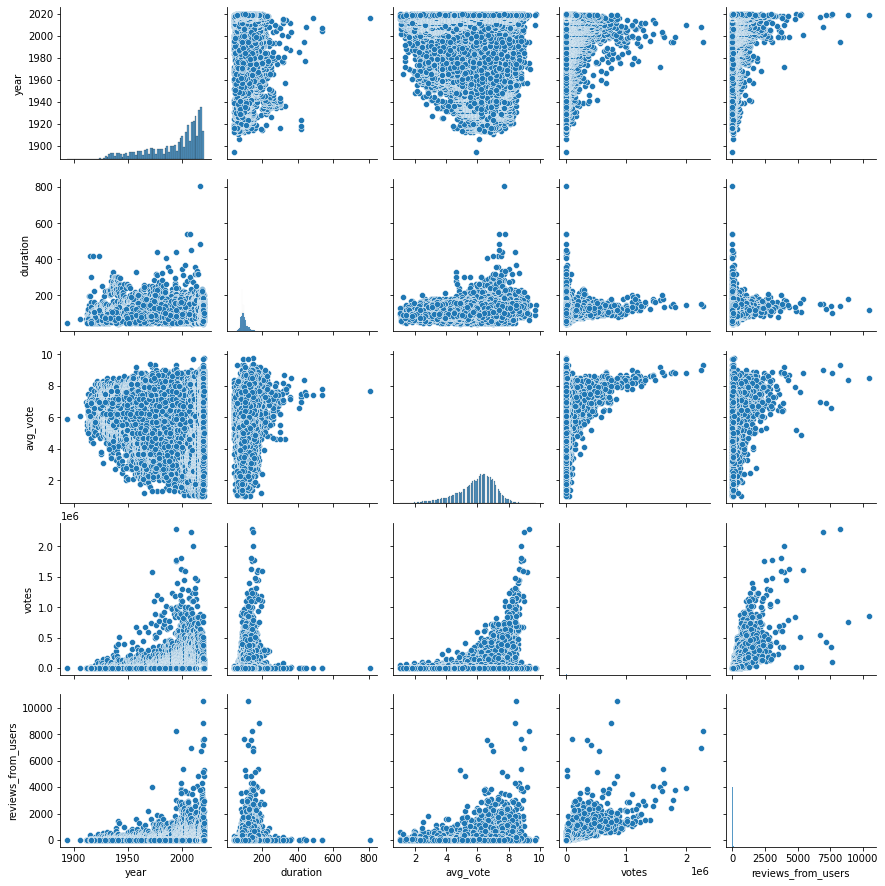

In [76]:
sns.pairplot(IMDBdata)
plt.show()

In [77]:
#IMDBdata.merge(Netflix, how = 'left').head()

# Part-III

**<font color = 'teal'> For further investigation and building Machine learning model, the two datasets are merged. The IMDB dataset is big, hence Kaggle dataset was merged into it.</font>**

In [78]:
Netflix.columns

Index(['title', 'cast', 'country', 'date_added', 'release_year',
       'duration_min', 'listed_in', 'description'],
      dtype='object')

In [79]:
IMDBdata.columns

Index(['original_title', 'year', 'genre', 'duration', 'country', 'language',
       'director', 'writer', 'production_company', 'actors', 'description',
       'avg_vote', 'votes', 'reviews_from_users'],
      dtype='object')

In [80]:
IMDBdata.rename(columns = {'original_title': 'title', 'year': 'release_year', 'duration': 'duration_min'}, inplace = True)

In [81]:
Netflix.rename(columns = {'cast': 'actors', 'listed_in': 'genre'}, inplace = True)

In [82]:
Netflix.columns

Index(['title', 'actors', 'country', 'date_added', 'release_year',
       'duration_min', 'genre', 'description'],
      dtype='object')

In [83]:
IMDBdata.columns

Index(['title', 'release_year', 'genre', 'duration_min', 'country', 'language',
       'director', 'writer', 'production_company', 'actors', 'description',
       'avg_vote', 'votes', 'reviews_from_users'],
      dtype='object')

In [84]:
IMDBdata.merge(Netflix, how = 'left').head()

,title,release_year,genre,duration_min,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users,date_added
0,Miss Jerry,1894,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,1.0,NaN
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,7.0,NaN
2,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,25.0,NaN
3,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,31.0,NaN
4,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484,13.0,NaN


In [85]:
IMDBdata.shape

(72043, 14)

# Summary

We used two movie datasets : Kaggle dataset (named Netflix) and IMDB dataset (named IMDBdata). The Kaggle dataset is smaller one with 4761 rows while IMDB dataset large with 72043 rows.<br><br>
Detail investigations into each column of both datasets was carried out and following conclusions were drwan:<br>
* Both datasets show USA ranked Number One in movie production, while India ranked Second followed by United Kingdom in Third place.<br><br>
* These are three movie production companies ranking as follows.<br>
Metro-Goldwyn-Mayer (MGM)    1267<br>
Warner Bros.                 1143<br>
Columbia Pictures             909<br><br>
* In USA top movie production company is: Metro-Goldwyn-Mayer <br>
In India top movie production company is: NH Studioz <br>
In UK top movie production company is: The Rank Organisation <br><br>
* Both datasets show most of the movies are of length ~100 mins.<br><br>
* As IMDB dataset is very large compared to Kaggle dataset, the Kaggle dataset was merged into IMDB dataset for further analysis.**